# Pre-processing dataset dan Labeling

In [1]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import nltk
import csv

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
clean_df = pd.read_csv('genshin_reviews.csv')
clean_df

,reviewId,userName,userImage,score,content,thumbsUpCount,at
0,2ea69484-93eb-4637-b04e-05b590c6b724,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5,"Overall bagus semua, char, grafik, musik, worl...",94,2024-07-06 00:49:05
1,9c27392e-58a7-408c-b7ef-fd4698c1f382,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5,dari grafik dan story udah bagus banget! karak...,766,2024-06-18 03:54:46
2,2f6ff0a7-d3bd-447a-bb44-bff436a10499,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,3,"Kalau dari grafik, dan animasinya sih udah bag...",59,2024-06-09 10:11:32
3,caf0285a-a30e-4554-bfbf-04d98045f84d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,1,"Tolong ditambah lagi reward untuk gachanya, un...",482,2024-06-08 06:41:10
4,70a6ed92-22b1-4931-bae6-fcec78d58586,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5,Dari grafik dan story udah bagus banget! Walau...,46,2024-06-30 13:04:02
...,...,...,...,...,...,...,...
10995,d8feb4f3-2393-416a-a565-4e09669b012f,Feez,https://play-lh.googleusercontent.com/a-/ALV-U...,4,"bagus dah intinya, cuma tambahkan mode offline...",0,2022-12-30 06:30:25
10996,10291799-30d1-4d5e-821f-9b66c6e30974,ratna gultom,https://play-lh.googleusercontent.com/a/ACg8oc...,5,Seru gw suka game ini karena menantang kalo ad...,0,2021-03-17 12:06:10
10997,f998cebf-b177-46db-9b8d-1a13900a1efc,Azis Hidayat,https://play-lh.googleusercontent.com/a/ACg8oc...,3,Tolong perbaiki bug punya saya tidak bisa ques...,0,2020-10-03 05:46:03
10998,9e5932f6-1d43-4c33-97be-4109d985c1b7,Nurhayati,https://play-lh.googleusercontent.com/a/ACg8oc...,5,"Gamenya sih bagus, tapi terlalu besar, tolong ...",0,2021-04-30 07:04:24


In [5]:
def cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'[0-9]+','', text)
  text = re.sub(r'[^\w\s]','', text)
  text = text.replace('\n', '')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip(' ')
  return text

def casefolding(text):
  text = text.lower()
  return text

def tokenization(text):
  text = word_tokenize(text)
  return text

def filtering(text):
  list_stopwords = set(stopwords.words('indonesian'))
  list_stopwords1 = set(stopwords.words('english'))
  list_stopwords.update(list_stopwords1)
  list_stopwords.update(["iya","yaa","gak","nya","na","sih","ku","di","ga","ya","gaa","loh","kah","woi","woii","woy"
  "aku", "anda", "adalah", "ada", "akan", "kami", "kita", "kepada", "dan", "dalam",
    "dari", "dengan", "dia", "ini", "itu", "saya", "telah", "untuk", "yang", "di", "ke",
    "pada", "oleh", "itu", "dengan", "sudah", "juga", "karena", "atau", "sebagai",
    "bahwa", "namun", "bisa", "mereka", "tentang", "sesuatu", "oleh", "jadi", "lebih",
    "akan", "tidak", "lagi", "setelah", "banyak", "hanya", "pada", "tersebut",
    "dalam", "tetapi", "dan", "sudah", "adalah", "itu", "sekarang", "saja", "sudah",
    "kalau", "semua", "akan", "masih", "harus", "di", "pada", "dengan","gua","gw", "lu", "loe", "oe", "gue","aja","emang","udah",
    "si","gitu","ni","kek"])
  filtered_text = []
  for word in text:
    if word not in list_stopwords:
      filtered_text.append(word)
  text = filtered_text
  return text

def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text
  words = [stemmer.stem(word) for word in words]
  text = ' '.join(words)
  return text

def toSentence(list_words):
  sentence = ' '.join(list_words)
  return sentence

In [6]:
slangwords = {"gk": "tidak", "ga": "tidak", "gak": "tidak", "lg": "lagi", "yg": "yang", "dr": "dari", "km": "kamu",
    "gw": "saya", "gue": "saya", "gu": "saya", "lo": "kamu", "lu": "kamu", "dgn": "dengan", "tp": "tapi", "tpi": "tapi",
    "bgt": "banget", "trs": "terus", "blm": "belum", "skrg": "sekarang", "bbrp": "beberapa", "kalo": "kalau",
    "kl": "kalau", "ngga": "tidak", "nggak": "tidak", "ttp": "tetap", "pdhl": "padahal", "msh": "masih", "sbg": "sebagai",
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
    "@": "di","abis": "habis","wtb": "beli","masi": "masih","wts": "jual","wtt": "tukar","bgt": "banget","maks": "maksimal","tp": "tapi","ngga": "tidak",}
def fix_slang(text):
  words = text.split()
  fixed_words = []
  for word in words:
    if word.lower() in slangwords:
      fixed_words.append(slangwords[word.lower()])
    else:
      fixed_words.append(word)

  fixed_text = ' '.join(fixed_words)
  return fixed_text

In [7]:
clean_df['text_clean'] = clean_df['content'].apply(cleaning)
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefolding)
clean_df['text_slangwords'] = clean_df['text_casefolding'].apply(fix_slang)
clean_df['text_tokenization'] = clean_df['text_slangwords'].apply(tokenization)
clean_df['text_filtering'] = clean_df['text_tokenization'].apply(filtering)
clean_df['text_akhir'] = clean_df['text_filtering'].apply(toSentence)

In [8]:
import requests

from io import StringIO

lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [9]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [10]:
results = clean_df['text_filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    5327
positive    5042
neutral      631
Name: count, dtype: int64


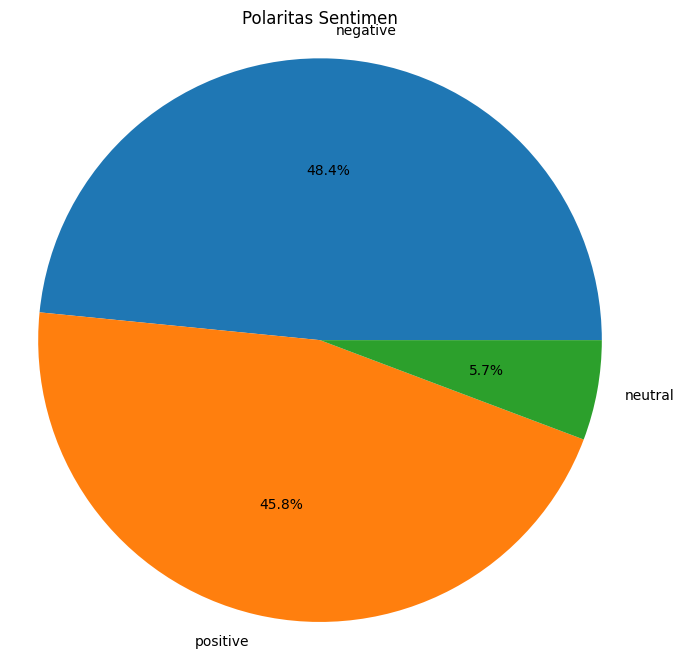

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(clean_df['polarity'].value_counts(), labels=clean_df['polarity'].value_counts().index, autopct='%1.1f%%')
plt.title('Polaritas Sentimen')
plt.axis('equal')
plt.show()

In [12]:
from sklearn.utils import resample

df_positive = clean_df[clean_df['polarity'] == 'positive']
df_negative = clean_df[clean_df['polarity'] == 'negative']
df_neutral = clean_df[clean_df['polarity'] == 'neutral']

df_neutral_oversampled = resample(df_neutral,
                                  replace=True,
                                  n_samples=len(df_negative),
                                  random_state=32)

df_oversampled = pd.concat([df_negative, df_positive, df_neutral_oversampled])
print(df_oversampled['polarity'].value_counts())

polarity
negative    5327
neutral     5327
positive    5042
Name: count, dtype: int64


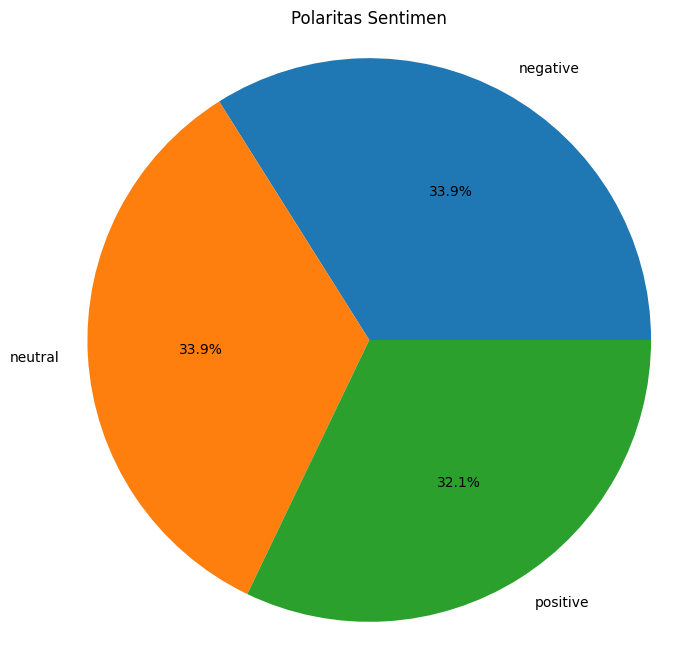

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(df_oversampled['polarity'].value_counts(), labels=df_oversampled['polarity'].value_counts().index, autopct='%1.1f%%')
plt.title('Polaritas Sentimen')
plt.axis('equal')
plt.show()

In [14]:
df_oversampled.to_csv('df_oversampled.csv', index=False)

# Algoritma Machine Learning Tradisional

Menggunakan algortima machine learning Logistic Regression dan eksraksi fitur TfidVectorizer. Membagi dataset 70:30. Dengan pelatihan ini saya mendapatkan akurasi 87% sesuai kriteria, tetapi tidak sampai lebih dari 92%  

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [82]:
x = df_oversampled['text_akhir']
y = df_oversampled['polarity']

tfidf = TfidfVectorizer(max_features=20000, min_df=17, max_df=0.8, ngram_range=(1, 2))
x_tfidf = tfidf.fit_transform(x)

features_df = pd.DataFrame(x_tfidf.toarray(), columns=tfidf.get_feature_names_out())

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.3, random_state=42)

In [84]:
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [91]:
model_lr = LogisticRegression(C=10,max_iter=5000, solver='saga')
model_lr.fit(x_train.toarray(), y_train)

LogisticRegression(C=10, max_iter=5000, solver='saga')

In [92]:
y_pred_train = model_lr.predict(x_train.toarray())
y_pred_test = model_lr.predict(x_test.toarray())

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy train: {accuracy_train}")
print(f"Accuracy test: {accuracy_test}")
print(classification_report(y_test, y_pred_test))

Accuracy train: 0.9874397014653682
Accuracy test: 0.8721596942025908
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1609
     neutral       0.85      0.99      0.92      1547
    positive       0.88      0.80      0.84      1553

    accuracy                           0.87      4709
   macro avg       0.87      0.87      0.87      4709
weighted avg       0.87      0.87      0.87      4709



# Model Deep learnig

Melakukan pelatihan menggunakan Model Deep learning untuk mendapatkan akurasi 92%. Untuk ini kita hanya menggunakan model CNN dan GRU

## Model GRU


Pada pelatihan ini menggunakan Model GRU dan mendapatkan akurasi yang lumayan tinggi yaitu 88%, tetapi masih tidak sesuai harapan.

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_oversampled['text_akhir'])
sequences = tokenizer.texts_to_sequences(df_oversampled['text_akhir'])

padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_oversampled['polarity'])
categorical_labels = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)

In [ ]:
model_GRU = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=100),
    Bidirectional(GRU(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    BatchNormalization(),
    Bidirectional(GRU(64, dropout=0.5, recurrent_dropout=0.5)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax'),
])

In [ ]:
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2729088   
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          74496     
 al)                                                             
                                                                 
 batch_normalization_4 (Bat  (None, 100, 128)          512       
 chNormalization)                                                
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                     

In [ ]:
model_GRU.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
            print("\nLatihannya Sudah Cukup ya!")
            self.model.stop_training = True

custom_callback = CustomCallback()
model_checkpoint = ModelCheckpoint('best_model_GRU.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

In [ ]:
history = model_GRU.fit(
        x_train,
        y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_test, y_test),
        callbacks=[custom_callback, reduce_lr, model_checkpoint]
  )

Epoch 1/10
99/99 [==============================] - 162s 1s/step - loss: 3.1231 - accuracy: 0.3488 - val_loss: 2.4888 - val_accuracy: 0.3436 - lr: 0.0010
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 162s 2s/step - loss: 2.2402 - accuracy: 0.4035 - val_loss: 1.9566 - val_accuracy: 0.3248 - lr: 0.0010
Epoch 3/10
99/99 [==============================] - 135s 1s/step - loss: 1.5863 - accuracy: 0.5778 - val_loss: 1.4387 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 4/10
99/99 [==============================] - 145s 1s/step - loss: 0.9413 - accuracy: 0.8115 - val_loss: 0.8828 - val_accuracy: 0.7876 - lr: 0.0010
Epoch 5/10
99/99 [==============================] - 132s 1s/step - loss: 0.5431 - accuracy: 0.9083 - val_loss: 0.6507 - val_accuracy: 0.8449 - lr: 0.0010
Epoch 6/10
99/99 [==============================] - 125s 1s/step - loss: 0.3499 - accuracy: 0.9426 - val_loss: 0.5338 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 7/10
99/99 [==============================] - 129s 1s/step - loss: 0.2405 - accuracy: 0.9579 - val_loss: 0.5226 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 8/10
99/99 [==============================] - 127s 1s/step - loss: 0.1908 - accur

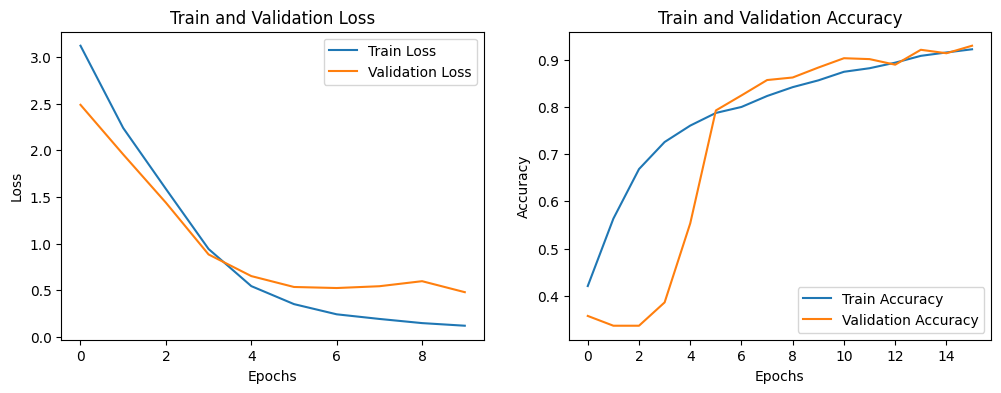

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss, accuracy = model_GRU.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test accuracy: {accuracy}")

99/99 [==============================] - 13s 129ms/step - loss: 0.4781 - accuracy: 0.8809
Test Loss: 0.47806668281555176
Test accuracy: 0.880891740322113


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model_GRU.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

99/99 [==============================] - 14s 123ms/step
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1058
     neutral       0.91      1.00      0.95      1008
    positive       0.89      0.79      0.83      1074

    accuracy                           0.88      3140
   macro avg       0.88      0.88      0.88      3140
weighted avg       0.88      0.88      0.88      3140



## Model CNN

Pada percobaan latihan menggunakan model CNN akhirnya mendapatkan akurasi yang tinggi yaitu lebih dari 92%. Untuk model ini akan dilakukan testing atau inference.

In [ ]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Input, MaxPooling1D, BatchNormalization, Flatten, LSTM, ZeroPadding1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


In [ ]:
x = df_oversampled['text_akhir']
y = df_oversampled['polarity']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

tfidf = TfidfVectorizer(max_features=100, ngram_range=(1,2))
x_tfidf = tfidf.fit_transform(x).toarray()
x_tfidf = x_tfidf[..., None]

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
model_cnn = Sequential([
    Input(shape=(x_tfidf.shape[1], 1)),
    ZeroPadding1D(padding=2),
    Conv1D(128, 5, activation='relu', padding='valid'),
    MaxPooling1D(),
    BatchNormalization(),
    Conv1D(256, 5, activation='relu', padding='valid'),
    MaxPooling1D(),
    BatchNormalization(),
    Conv1D(512, 5, activation='relu', padding='valid'),
    MaxPooling1D(),
    BatchNormalization(),
    Conv1D(256, 5, activation='relu', padding='valid'),
    MaxPooling1D(),
    BatchNormalization(),
    LSTM(128, return_sequences=True),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding1d (ZeroPaddin  (None, 104, 1)            0         
 g1D)                                                            
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          768       
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 128)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 128)           512       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 256)           164096    
                                                        

In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
            print("\nLatihannya Sudah Cukup ya!")
            self.model.stop_training = True

custom_callback = CustomCallback()
model_checkpoint = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

In [ ]:
history_cnn = model_cnn.fit(x_tfidf,
                        y,
                        batch_size=128,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        callbacks=[custom_callback, reduce_lr, model_checkpoint])

Epoch 1/20
123/123 [==============================] - 15s 30ms/step - loss: 1.0707 - accuracy: 0.4209 - val_loss: 1.1012 - val_accuracy: 0.3576 - lr: 0.0010
Epoch 2/20
  5/123 [>.............................] - ETA: 1s - loss: 0.9844 - accuracy: 0.5250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


123/123 [==============================] - 2s 16ms/step - loss: 0.9229 - accuracy: 0.5635 - val_loss: 1.1468 - val_accuracy: 0.3369 - lr: 0.0010
Epoch 3/20
123/123 [==============================] - 2s 16ms/step - loss: 0.7273 - accuracy: 0.6683 - val_loss: 1.9183 - val_accuracy: 0.3369 - lr: 0.0010
Epoch 4/20
123/123 [==============================] - 2s 19ms/step - loss: 0.5956 - accuracy: 0.7256 - val_loss: 2.7871 - val_accuracy: 0.3863 - lr: 0.0010
Epoch 5/20
123/123 [==============================] - 2s 19ms/step - loss: 0.5257 - accuracy: 0.7603 - val_loss: 1.6427 - val_accuracy: 0.5535 - lr: 0.0010
Epoch 6/20
123/123 [==============================] - 2s 17ms/step - loss: 0.4731 - accuracy: 0.7871 - val_loss: 0.4645 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 7/20
123/123 [==============================] - 2s 17ms/step - loss: 0.4463 - accuracy: 0.7998 - val_loss: 0.4028 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 8/20
123/123 [==============================] - 2s 17ms/step - loss: 

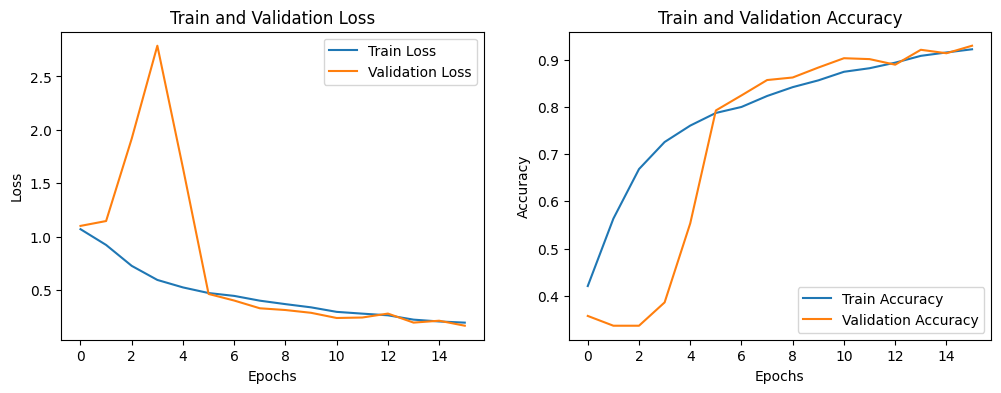

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss, accuracy = model_cnn.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test accuracy: {accuracy}")

99/99 [==============================] - 1s 6ms/step - loss: 0.1673 - accuracy: 0.9293
Test Loss: 0.1672692894935608
Test accuracy: 0.9292993545532227


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model_cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

99/99 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

    negative       0.91      0.92      0.91      1058
     neutral       0.94      0.99      0.97      1008
    positive       0.94      0.88      0.91      1074

    accuracy                           0.93      3140
   macro avg       0.93      0.93      0.93      3140
weighted avg       0.93      0.93      0.93      3140



# Membuat file requirements.txt

In [ ]:
!pip freeze > requirements.txt